In [7]:
from datetime import datetime, timedelta
a = datetime(2020,1,12,23,10)
a + timedelta(minutes=10)

datetime.datetime(2020, 1, 12, 23, 20)

### Because the 2019 and 2020 radar data is of size 881x921,
### it must be cropped into 561x441 first. Plz execute the cropRadar.py

(打不開的radar.nc: 20190730_0250.nc, 20201112_2250.nc, 20210302_0730.nc, 20210727_1220.nc, 20210808_1610.nc, 20210808_2210.nc)

In [ ]:
python /wk171/handsomedong/heterogeneous/DeepQPF_ChiaTung/pre_process/cropRadar.py \
'.../DLRA_database/radar_2d_uncompressed/2019/'
# .../DLRA_database/radar_2d_uncompressed/yyyy/yyyymm/yyyymmdd_hhmm.nc

===========================================
### Compressing both rain and radar data into .nc.gz

(打不開的rain.nc: 20170831_2010.nc, 20171126_1310.nc, 20171126_1910.nc, 20171126_1930.nc, 20171126_1940.nc, 20171126_2110.nc, 20171126_2130.nc, 20191121_0540.nc, 20200325_2310.nc, 20201112_2340.nc, 20210813_0750.nc)

In [ ]:
python /wk171/handsomedong/after_Meeting/preprocess/compress_data.py \
'.../DLRA_database/radar_2d_uncompressed/2019' \
'.../DLRA_database/radar_2d_compressed/' \
--year_id 1 \
--workers 8 \
--overwrite

# TEST========

In [22]:
import netCDF4 as nc
import numpy as np
f = nc.Dataset('/bk2/handsomedong/DLRA_database/rain_uncompressed/2020/202002/20200227_1450.nc', 'r')
print(f)
a = f['qperr'][:]
a[np.where(a.mask != False)]= -99
a.shape

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lon(441), lat(561)
    variables(dimensions): float64 lon(lon), float64 lat(lat), float32 qperr(lat,lon)
    groups: 


/tmp/ipykernel_14995/125441156.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = f['qperr'][:]


(561, 441)

In [1]:
import numpy as np
b = np.loadtxt('/bk2/handsomedong/DLRA_database/radar_2d_compressed/2015/201501/20150101/MREF3D21L.20150101.1850.gz')
b

array([[138. , 138. , 138. , ..., 277. , 277. , 278. ],
       [248. , 249. , 250. , ..., 300. , 301. , 300. ],
       [ 10.5,  15. ,  21.5, ...,   1.5,   1. ,   2. ]])

In [20]:
import pickle
with open('/wk171/handsomedong/after_Meeting/test_output/oupData.pkl', 'rb') as f:
    inp, c = pickle.load(f)

# single plot =============

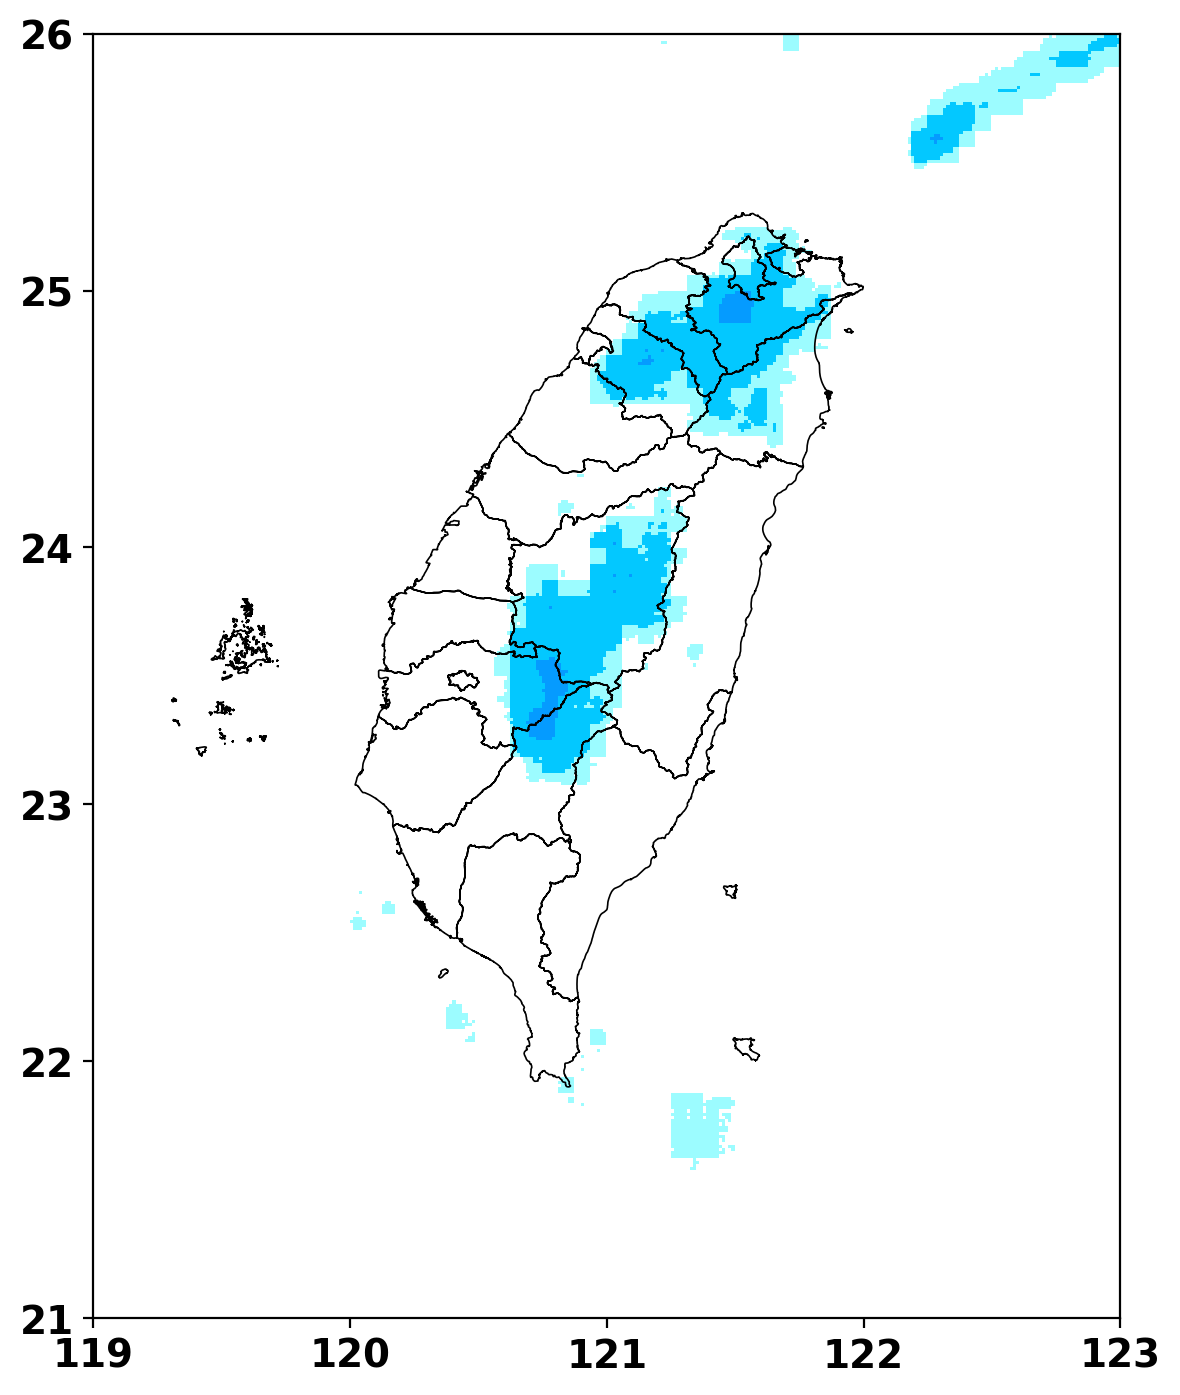

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

font = {'family'     : 'sans-serif',
        'weight'     : 'bold',
        'size'       : 14
        }
axes = {'titlesize'  : 16,
        'titleweight': 'bold',
        'labelsize'  : 14,
        'labelweight': 'bold'
        }
mpl.rc('font', **font)  # pass in the font dict as kwargs
mpl.rc('axes', **axes)

#set colorbar
cwbRR = mpl.colors.ListedColormap(['#FFFFFF', '#9CFCFF', '#03C8FF', '#059BFF', '#0363FF',
                                   '#059902', '#39FF03', '#FFFB03', '#FFC800', '#FF9500',
                                   '#FF0000', '#CC0000', '#990000', '#960099', '#C900CC',
                                   '#FB00FF', '#FDC9FF'])
bounds = [ 0, 1, 2, 5, 10, 15, 20, 30, 40, 50, 70, 90, 110, 130, 150, 200, 300]
norm = mpl.colors.BoundaryNorm(bounds, cwbRR.N)

### city edge
mat = sio.loadmat('/wk171/handsomedong/after_Meeting/evaluation/city_lonlat_region5.mat')
citylon = mat['citylon']
citylat = mat['citylat']
del mat
### model axis
latStart = 20; latEnd = 27;
lonStart = 118; lonEnd = 123.5;
lat = np.linspace(latStart,latEnd,561)[10:550]
lon = np.linspace(lonStart,lonEnd,441)[10:430]
lon, lat = np.meshgrid(lon, lat)
fig, ax = plt.subplots(1,1, figsize=(10, 8.5), dpi=200, facecolor='w')
ax.plot(citylon,citylat,'k',linewidth=0.6)
ax.axis([119, 123, 21, 26])# whole area [119, 123, 21, 26]
ax.set_aspect('equal')
ax.pcolormesh(lon, lat, c[0], edgecolors='none',
              shading='auto', norm=norm, cmap=cwbRR)
ax.set_xticks(range(119,124,1))